<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/Telco_Customer_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TELCO CUSTOMER CHURN SERVICES DATA ANALYSIS**

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Fetching the dataset
df=pd.read_csv("/content/drive/MyDrive/Retail_Business/telechurn_dataset.csv")

In [ ]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
# Fetching the dataset
df=pd.read_csv("/content/drive/MyDrive/Retail_Business/telechurn_dataset.csv")
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

NameError: name 'df' is not defined

Data Cleaning -
Handling missing values and removed unnecessary columns.

In [ ]:
missing_values = df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

df_filled = df.fillna(df.median(numeric_only=True))

print(f"Missing values after treatment:\n{df_filled.isnull().sum()}")


NameError: name 'df' is not defined

In [ ]:
df_cleaned = df.dropna(subset=['Offer', 'Internet Type'])

print(f"Missing values after dropping rows with missing categorical data:\n{df_cleaned.isnull().sum()}")


Missing values after dropping rows with missing categorical data:
Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       

In [ ]:
df = df.drop(columns=['Customer ID', 'Count', 'Quarter'])

df = df.dropna()

print(df.isnull().sum())


Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

Treatment for outliers

In [ ]:
# Using IQR to detect outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Number of rows after outlier removal: {df_no_outliers.shape[0]}")


Number of rows after outlier removal: 4898


Label encoding

In [ ]:
nominal_columns = ['Offer', 'Internet Type', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service']

# label encoding to all nominal columns
le = LabelEncoder()

for col in nominal_columns:
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# Display the encoded columns
print(df[['Offer', 'Offer_encoded', 'Internet Type', 'Internet Type_encoded']].head())


     Offer  Offer_encoded Internet Type  Internet Type_encoded
0      NaN              5           DSL                      1
1  Offer E              4   Fiber Optic                      2
2  Offer D              3   Fiber Optic                      2
3  Offer C              2   Fiber Optic                      2
4  Offer C              2   Fiber Optic                      2


Nominal data deletion

In [ ]:
df_cleaned = df.drop(columns=nominal_columns)


 **Clustering**

Here, we will user K-Means clustering to analyze customer segments based on features such as Internet Service, Internet Type

Clustering for key features 'Total Revenue', 'Tenure in Months', 'Monthly Charge', 'Avg Monthly GB Download', 'Referred a Friend'

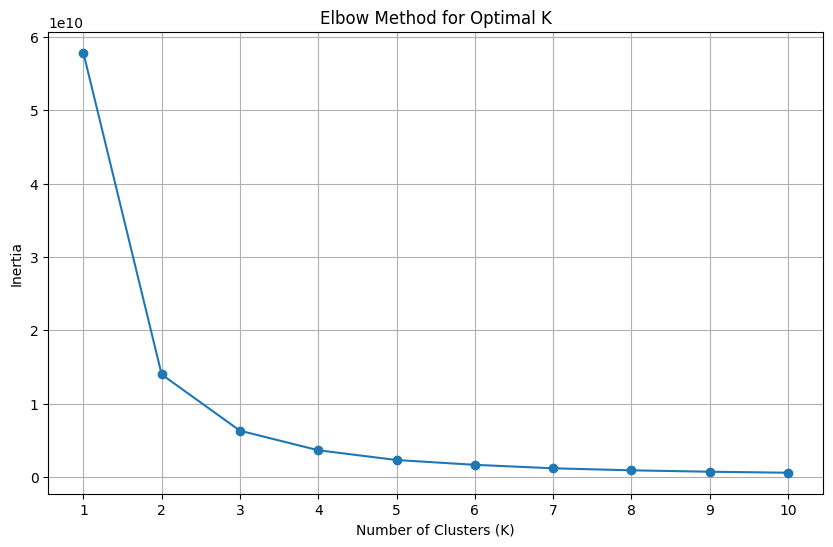

In [ ]:
inertia = []
k_values = range(1, 11)  # Test cluster sizes from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)  # Append the inertia for the current k

# Step 4: Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

From the above graph, we can see that the optimal no of clusters are 3



---


KMeans clustering and Visualization of clusters.

Silhouette Score for k=3: 0.6253513093330758
Calinski-Harabasz Score: 28689.593808745856


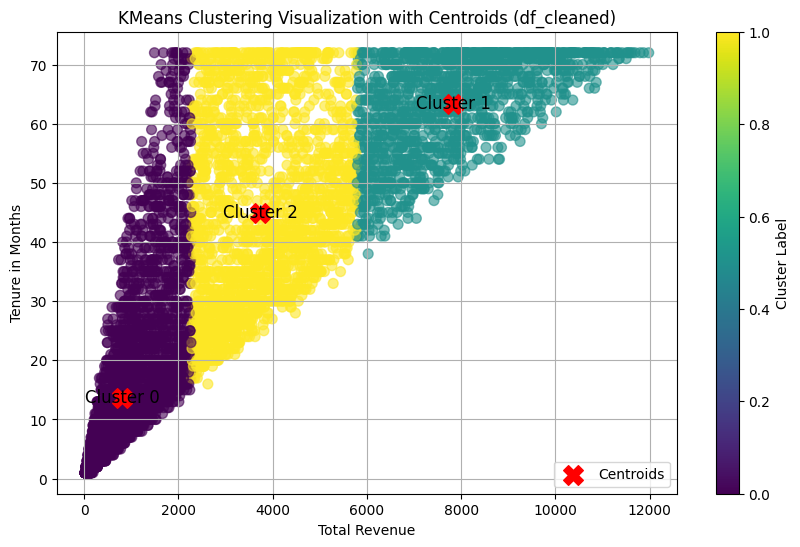

In [ ]:
selected_columns = ['Total Revenue', 'Tenure in Months', 'Monthly Charge', 'Avg Monthly GB Download']

if 'Referred a Friend' in df_cleaned.columns:
    selected_columns.append('Referred a Friend')

selected_features = df_cleaned[selected_columns]

if 'Referred a Friend' in selected_features.columns:
    selected_features = pd.get_dummies(selected_features, columns=['Referred a Friend'], drop_first=True)

selected_features = selected_features.dropna()

#KMeans Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(selected_features)

df_cleaned['Cluster'] = clusters

# Calculate silhouette score
silhouette_avg = silhouette_score(selected_features, clusters)
print(f'Silhouette Score for k={k}: {silhouette_avg}')

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(selected_features, clusters)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

#Visualize Clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)

# Calculate centroids for the clusters
centroids = kmeans.cluster_centers_

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add cluster labels to centroids
for i in range(centroids.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], f'Cluster {i}', fontsize=12, ha='center', va='center', color='black')

# Visualizing the Clusters
plt.title('KMeans Clustering Visualization with Centroids (df_cleaned)')
plt.xlabel('Total Revenue')
plt.ylabel('Tenure in Months')

# Add color bar
plt.colorbar(label='Cluster Label')

# Add legend for centroids
plt.legend()

plt.grid()
plt.show()


Silhouette Score : 0.62

Calinski Harabasz Score : 28689.59





---

Aggregate mean of each cluster

In [ ]:
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])

numeric_df_cleaned['Cluster'] = df_cleaned['Cluster']

cluster_means = numeric_df_cleaned.groupby('Cluster').mean()

print("Aggregate Mean of Each Cluster:")
print(cluster_means)


Aggregate Mean of Each Cluster:
         Count  Number of Referrals  Tenure in Months  \
Cluster                                                 
0          1.0             1.279279         13.719083   
1          1.0             3.121795         63.367521   
2          1.0             2.367409         44.979251   

         Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Cluster                                                               
0                                20.487330                17.700792   
1                                28.618376                26.900285   
2                                23.519545                21.196356   

         Monthly Charge  Total Charges  Total Refunds  \
Cluster                                                 
0             51.643161     584.904952       1.570333   
1             95.408405    6045.990598       1.928661   
2             67.304808    2747.797368       2.712389   

         Total Extra Data Charges  Total

In [ ]:
# Average of each cluster
cluster_averages = numeric_df_cleaned.groupby('Cluster').mean()

print("Average Values of Each Cluster:")
print(cluster_averages)

Average Values of Each Cluster:
         Count  Number of Referrals  Tenure in Months  \
Cluster                                                 
0          1.0             1.279279         13.719083   
1          1.0             3.121795         63.367521   
2          1.0             2.367409         44.979251   

         Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
Cluster                                                               
0                                20.487330                17.700792   
1                                28.618376                26.900285   
2                                23.519545                21.196356   

         Monthly Charge  Total Charges  Total Refunds  \
Cluster                                                 
0             51.643161     584.904952       1.570333   
1             95.408405    6045.990598       1.928661   
2             67.304808    2747.797368       2.712389   

         Total Extra Data Charges  Total

In [ ]:
#creating a csv file
df_cleaned['Cluster'] = clusters

df_cleaned.to_csv("telechurnn.csv", encoding="utf-8", index=False)

import os
os.getcwd()

'/content'

In [ ]:
#Tabulating the results
data = [
    [1, "K-Means clustering", silhouette_avg, calinski_harabasz_avg]
]
headers = ["S.No", "Clustering Model", "Silhouette Score", "Calinski Harabasz Score"]

table = tabulate(data, headers=headers, tablefmt="pretty")

print(table)


+------+--------------------+--------------------+-------------------------+
| S.No |  Clustering Model  |  Silhouette Score  | Calinski Harabasz Score |
+------+--------------------+--------------------+-------------------------+
|  1   | K-Means clustering | 0.6253513093330758 |   28689.593808745856    |
+------+--------------------+--------------------+-------------------------+


**Observation:**


*   Cluster 0 represented long-tenured, high-revenue customers.
*   Cluster 1 consisted of newer customers with lower revenue.
*   Cluster 2 represented moderate-tenure customers with intermediate levels of revenue.




